# Coffee Roasting Network using Deep Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


## DataSet

In [3]:
df=pd.read_csv(r"C:\Users\abdul\Downloads\PROJECTS\ML PROJECTS\Coffee_Roasting\Data\Coffee_Roasting_data.csv")
df.head()

,Temperature,Duration,Output
0,185.317638,12.693965,1.0
1,259.920475,11.867664,0.0
2,231.013571,14.414242,0.0
3,175.366645,11.720587,0.0
4,187.120865,14.129732,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Duration     200 non-null    float64
 2   Output       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [55]:
df.isnull().sum()

Temperature    0
Duration       0
Output         0
dtype: int64

In [56]:
df.describe()

,Temperature,Duration,Output
count,200.000000,200.000000,200.000000
mean,218.667833,13.430685,0.215000
std,40.061937,1.131249,0.411853
min,151.323722,11.512747,0.000000
25%,184.739493,12.470893,0.000000
50%,220.252393,13.269895,0.000000
75%,252.708620,14.412054,0.000000
max,284.994342,15.454207,1.000000


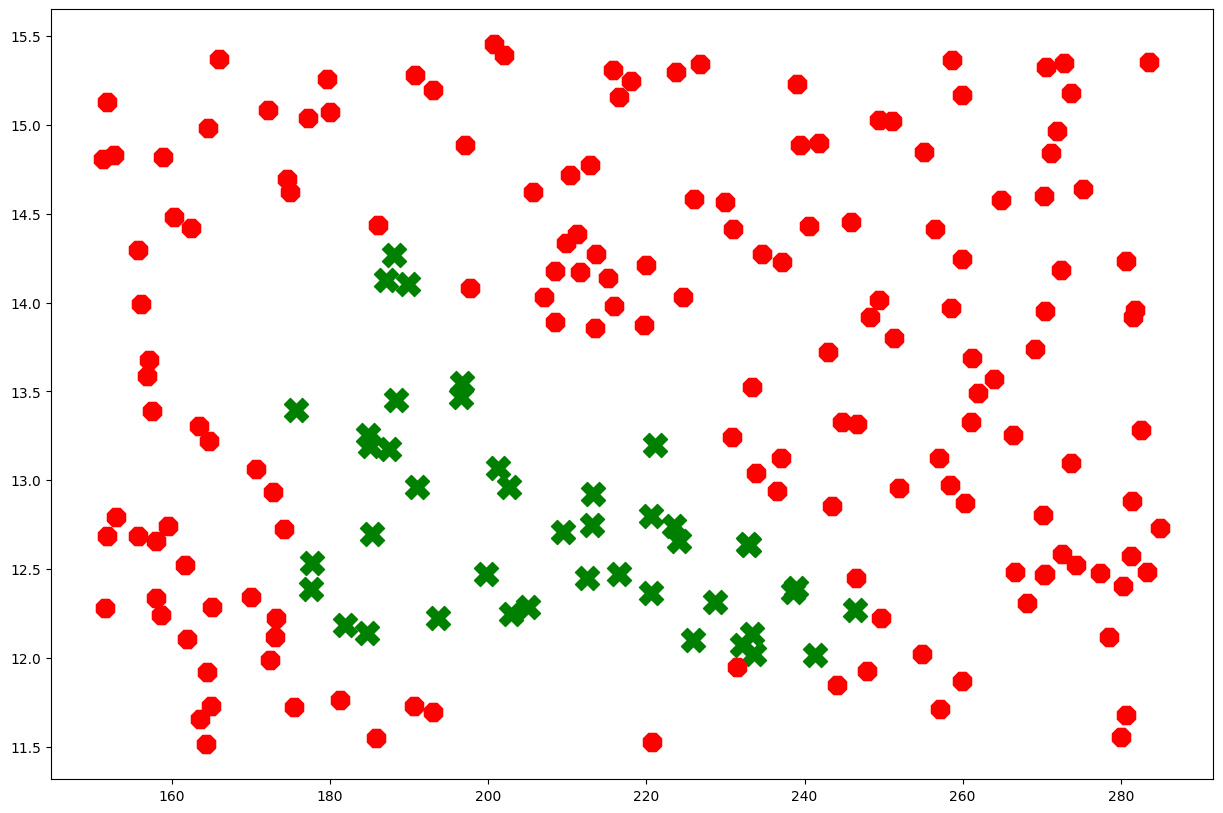

In [57]:
plt.figure(figsize=(15,10))
df1=df[df["Output"]!=0]
df2=df[df["Output"]!=1]
plt.scatter(df1["Temperature"],df1["Duration"],c="g",marker="X",s=300)
plt.scatter(df2["Temperature"],df2["Duration"],c="r",marker="8",s=200)
plt.show()

### Splitting Data

In [58]:
X=df.iloc[:,[0,1]].to_numpy()
Y=df.iloc[:,[2]].to_numpy()
print(X.shape, Y.shape)

(200, 2) (200, 1)


### Normalize Data

In [59]:
print(f"Temperature Max, Min pre normalization : {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization : 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


Tile/copy our data to increase the training set size and reduce the number of training epochs.

In [60]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


## Tensorflow Model

### Model
  
Let's build the "Coffee Roasting Network". There are two layers with first with relu activation and second sigmoid activation 

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [207]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='relu', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [208]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [209]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-1.0559987   0.3533255  -1.058758  ]
 [-0.93246025  0.20216131 -0.84794265]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[0.40351045]
 [0.7285813 ]
 [0.70271873]] 
b2(1,): [0.]


In [210]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02))

model.fit(Xt,Yt,epochs=10)

Epoch 1/10
6250/6250 [==============================] - 21s 3ms/step - loss: 0.2194
Epoch 2/10
6250/6250 [==============================] - 20s 3ms/step - loss: 0.2009
Epoch 3/10
6250/6250 [==============================] - 20s 3ms/step - loss: 0.2011
Epoch 4/10
6250/6250 [==============================] - 19s 3ms/step - loss: 0.2008
Epoch 5/10
6250/6250 [==============================] - 19s 3ms/step - loss: 0.2008
Epoch 6/10
6250/6250 [==============================] - 19s 3ms/step - loss: 0.2006
Epoch 7/10
6250/6250 [==============================] - 19s 3ms/step - loss: 0.2009
Epoch 8/10
6250/6250 [==============================] - 19s 3ms/step - loss: 0.2009
Epoch 9/10
6250/6250 [==============================] - 19s 3ms/step - loss: 0.2006
Epoch 10/10
6250/6250 [==============================] - 19s 3ms/step - loss: 0.2006


In [169]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:\n", b1)
print("W2:\n", W2, "\nb2:\n", b2)

W1:
 [[ 8.298131   -0.12478794 -7.5009284 ]
 [ 7.0059333  -7.0996823  -0.34953827]] 
b1:
 [ 2.6692812 -6.8018265 -6.8555365]
W2:
 [[-24.236807]
 [-20.466927]
 [-31.64108 ]] 
b2:
 [46.367115]


### Predictions

In [170]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 50ms/step
predictions = 
 [[0.9933273]
 [0.       ]]


To convert the probabilities to a decision, we apply a threshold:

In [171]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


# Custom Model

In [150]:
import numpy as np

In [172]:
def sigmoid(z):
    yhat=1/(1+np.exp(-(z)))
    return yhat

In [173]:
def Dense_(a,w,b):
    z=(np.dot(a,w)+b)
    yhat=sigmoid(z)
    return yhat

In [174]:
def Sequential_(X,w1,b1,w2,b2):
    a1=Dense_(X,w1,b1)
    a2=Dense_(a1,w2,b2)
    return a2

In [175]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = Sequential_(X[i], W1, b1, W2, b2)
    return(p)

In [176]:
w1, b1 = model.get_layer("layer1").get_weights()
w2, b2 = model.get_layer("layer2").get_weights()

In [211]:
 Sequential_(Xt,w1,b1,w2,b2)

array([[2.9349280e-23],
       [3.5298617e-12],
       [3.3695282e-12],
       ...,
       [5.2272174e-19],
       [4.8025201e-16],
       [5.1996108e-20]], dtype=float32)

In [212]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [213]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)
predictions

array([[9.71932288e-01],
       [3.28978626e-08]])

In [214]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


The End ...